In [134]:
import MetaTrader5 as mt5
import pandas as pd
import pandas_ta as ta
import time
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pytz
from pylab import mpl, plt

In [135]:
if not mt5.initialize():
    print('initialize() falhou')
    mt5.shutdown()

In [136]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [137]:
def get_ohlc(ativo, timeframe, n=5):
    ativo = mt5.copy_rates_from_pos(ativo, timeframe, 0, n)
    ativo = pd.DataFrame(ativo)
    ativo['time'] = pd.to_datetime(ativo['time'], unit='s')
    ativo.set_index('time', inplace=True)
    return ativo

In [138]:
df_analise = get_ohlc('PETR4', mt5.TIMEFRAME_D1, 500)

In [139]:
df_analise

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2020-01-31,23.41,23.58,23.15,23.26,45375,1,55446700
2020-02-03,23.32,23.49,23.03,23.04,61451,1,39452800
2020-02-04,23.43,23.75,23.35,23.41,87718,1,57718400
2020-02-05,23.75,23.89,23.21,23.21,90472,1,67994500
2020-02-06,23.47,24.13,22.99,23.86,116290,1,126114000
...,...,...,...,...,...,...,...
2022-01-31,32.50,33.00,32.07,32.35,108580,1,62450300
2022-02-01,32.35,33.32,31.95,33.00,92039,1,57315200
2022-02-02,33.41,33.49,32.36,32.52,80693,1,36271700


In [140]:
df_analise['M20'] = ta.sma(df_analise['close'], length=20)
df_analise['M50'] = ta.sma(df_analise['close'], length=50)
df_analise['M200'] = ta.sma(df_analise['close'], length=200)

In [141]:
#inicialmente teste com 1000ticks
df_analise['Dist20'] = df_analise['close'] - df_analise['M20'] 
df_analise['Dist50'] = df_analise['close'] - df_analise['M50']
df_analise['Dist200'] = df_analise['close'] - df_analise['M200']

In [142]:
df = df_analise
df

,open,high,low,close,tick_volume,spread,real_volume,M20,M50,M200,Dist20,Dist50,Dist200
time,,,,,,,,,,,,,
2020-01-31,23.41,23.58,23.15,23.26,45375,1,55446700,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-03,23.32,23.49,23.03,23.04,61451,1,39452800,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-04,23.43,23.75,23.35,23.41,87718,1,57718400,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-05,23.75,23.89,23.21,23.21,90472,1,67994500,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-06,23.47,24.13,22.99,23.86,116290,1,126114000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,32.50,33.00,32.07,32.35,108580,1,62450300,30.8770,29.0554,24.82120,1.4730,3.2946,7.52880
2022-02-01,32.35,33.32,31.95,33.00,92039,1,57315200,31.0670,29.2480,24.88665,1.9330,3.7520,8.11335
2022-02-02,33.41,33.49,32.36,32.52,80693,1,36271700,31.2895,29.4262,24.95165,1.2305,3.0938,7.56835


In [143]:
df = df[df['real_volume'] > 0]
df

,open,high,low,close,tick_volume,spread,real_volume,M20,M50,M200,Dist20,Dist50,Dist200
time,,,,,,,,,,,,,
2020-01-31,23.41,23.58,23.15,23.26,45375,1,55446700,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-03,23.32,23.49,23.03,23.04,61451,1,39452800,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-04,23.43,23.75,23.35,23.41,87718,1,57718400,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-05,23.75,23.89,23.21,23.21,90472,1,67994500,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-06,23.47,24.13,22.99,23.86,116290,1,126114000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,32.50,33.00,32.07,32.35,108580,1,62450300,30.8770,29.0554,24.82120,1.4730,3.2946,7.52880
2022-02-01,32.35,33.32,31.95,33.00,92039,1,57315200,31.0670,29.2480,24.88665,1.9330,3.7520,8.11335
2022-02-02,33.41,33.49,32.36,32.52,80693,1,36271700,31.2895,29.4262,24.95165,1.2305,3.0938,7.56835


In [144]:
def percentil(data, up=90, down=10):
    x = data
    x = x.dropna()
    array_x = np.array(x)
    percentil_up = np.percentile(array_x, up)
    percentil_down = np.percentile(array_x, down)
    
    return percentil_up, percentil_down

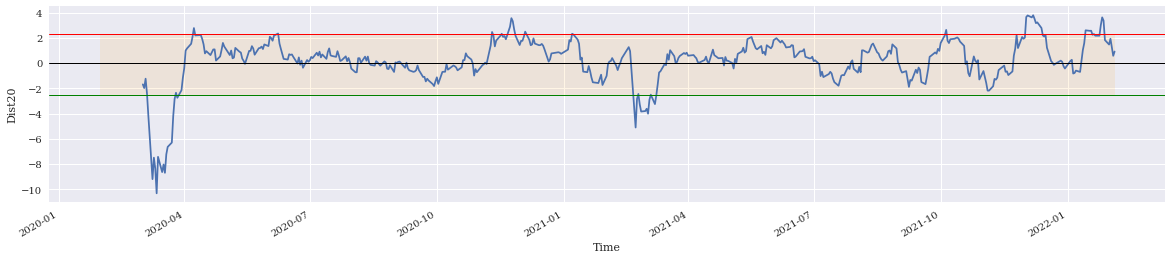

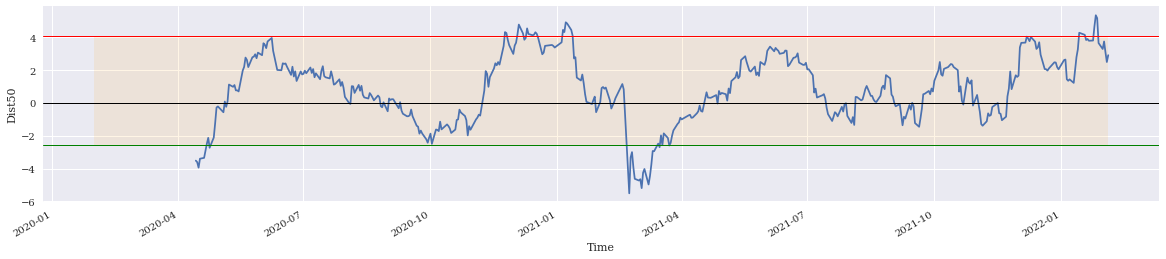

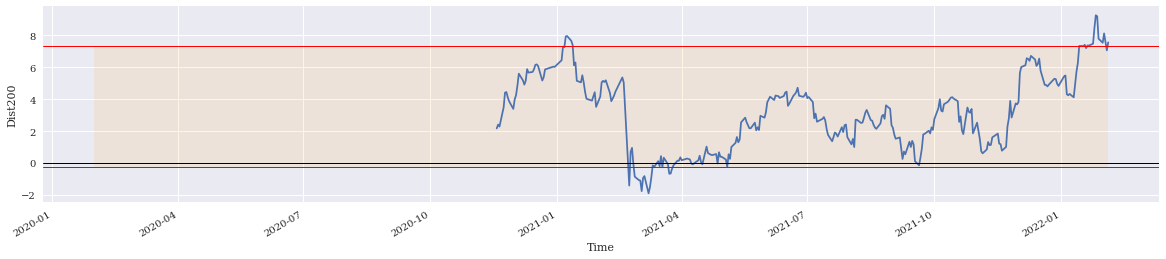

In [149]:
plt.rcParams['figure.figsize'] = (20,4)
# parametros percentil
up = 95
down = 5

per_m20 = percentil(df['Dist20'], up, down)
ax = df['Dist20'].plot()
ax.fill_between(df.index, per_m20[0], per_m20[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_m20[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
plt.axhline(per_m20[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist20')
plt.show()

per_m50 = percentil(df['Dist50'], up, down)
ax = df['Dist50'].plot()
ax.fill_between(df.index, per_m50[0], per_m50[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_m50[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
#plt.axhline(10.0, color="grey", lw=1.0)
plt.axhline(per_m50[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist50')
plt.show()

per_m200 = percentil(df['Dist200'], up, down)
ax = df['Dist200'].plot()
ax.fill_between(df.index, per_m200[0], per_m200[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_m200[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
plt.axhline(per_m200[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist200')
plt.show()

In [146]:
df['Dist20'].describe()

count    481.000000
mean       0.181400
std        1.850298
min      -10.326500
25%       -0.521500
50%        0.385000
75%        1.193500
max        3.795500
Name: Dist20, dtype: float64

In [147]:
df['Dist50'].describe()

count    451.000000
mean       0.883015
std        2.056133
min       -5.500400
25%       -0.522200
50%        0.875600
75%        2.346400
max        5.350200
Name: Dist50, dtype: float64

In [148]:
df['Dist200'].describe()

count    301.000000
mean       3.160855
std        2.348247
min       -1.886850
25%        1.319500
50%        3.023150
75%        4.857050
max        9.250250
Name: Dist200, dtype: float64